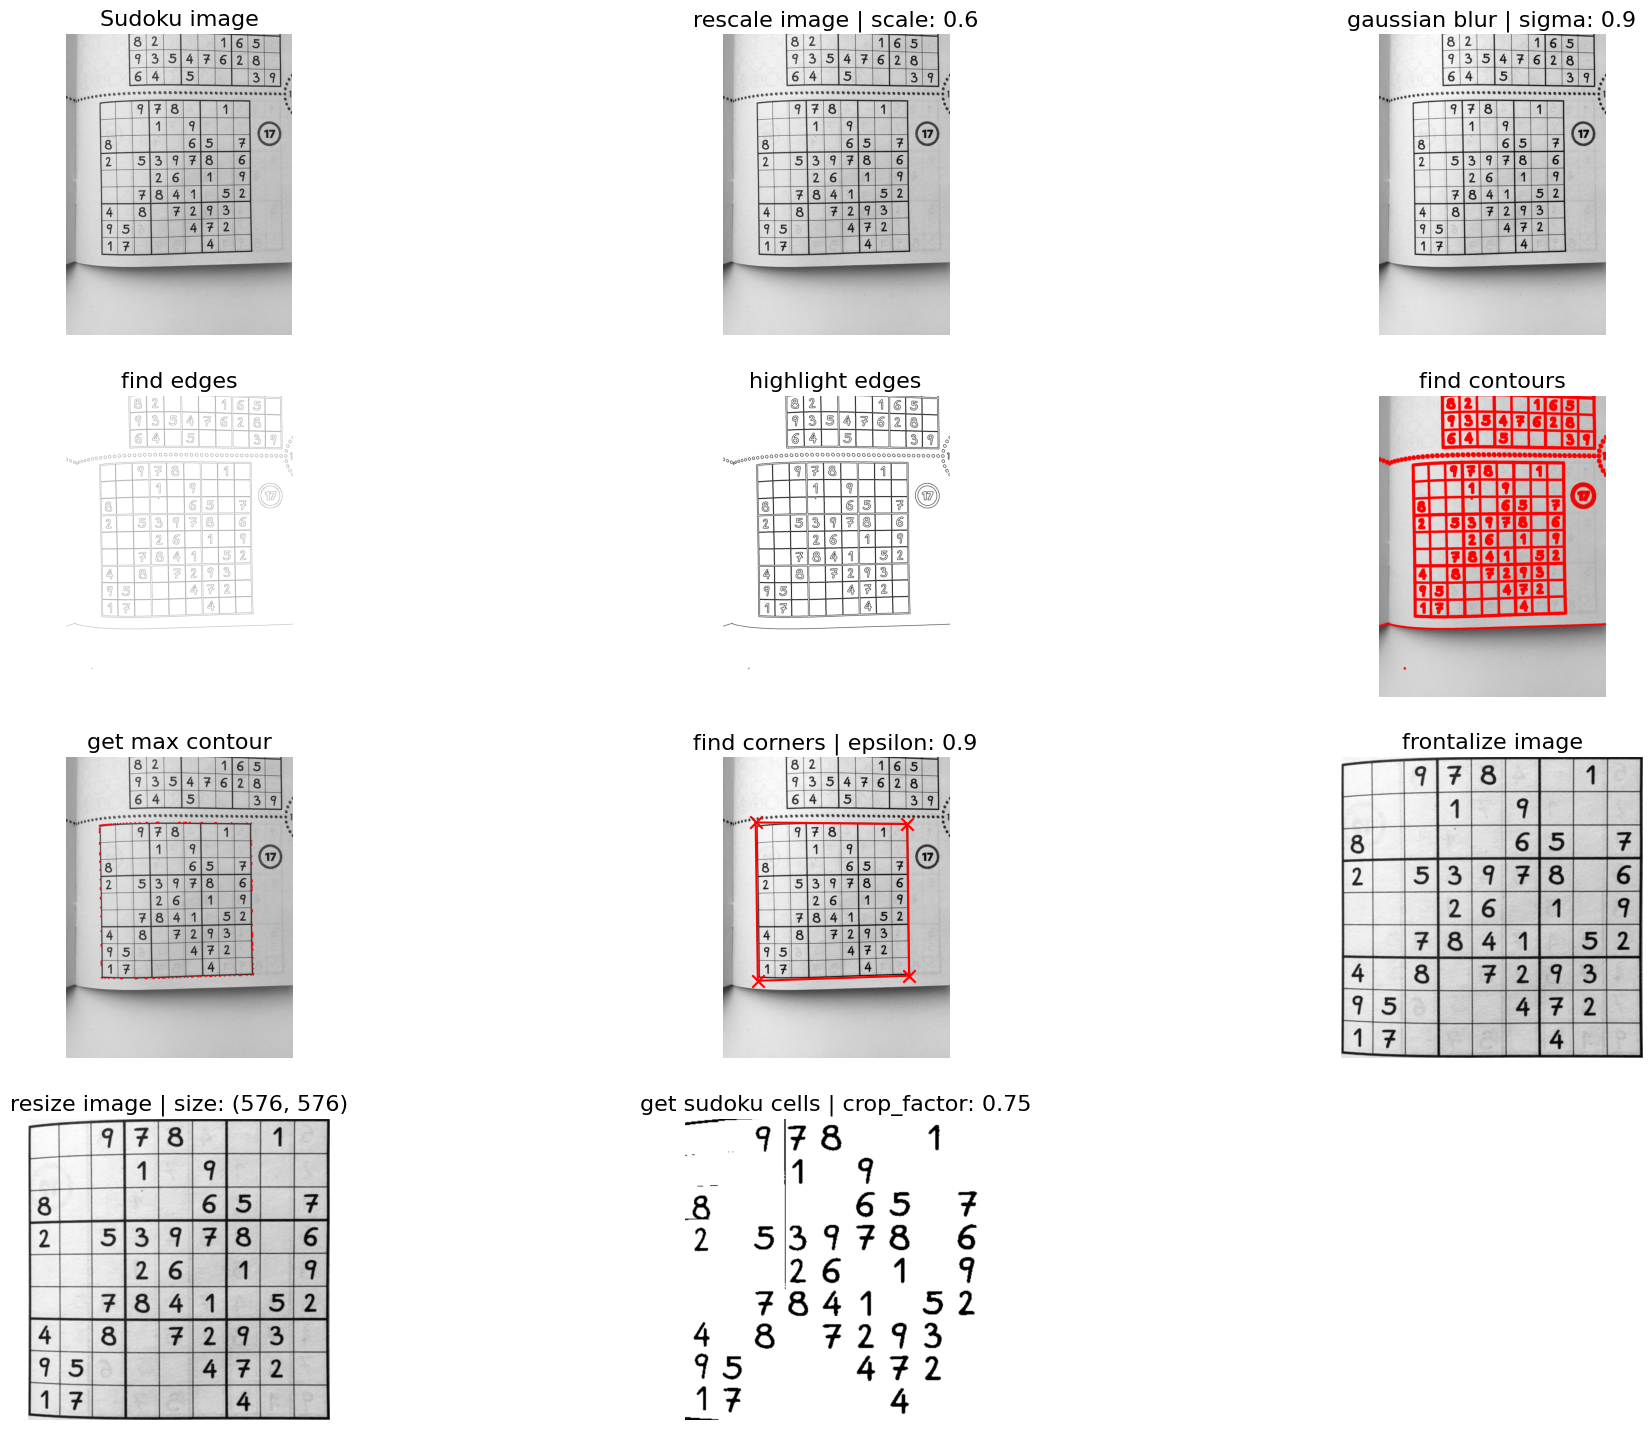

In [1]:
import os

from const import TRAIN_IMAGES_PATH
from utils import read_image, show_image
from pipeline import Pipeline
from frontalization import find_edges, highlight_edges, find_contours, get_max_contour, find_corners, rescale_image, gaussian_blur, frontalize_image, show_frontalized_images

from const import SUDOKU_SIZE
from recognition import resize_image, get_sudoku_cells


from recognition import get_sudoku_cells

from utils import load_templates
from recognition import get_digit_correlations, show_correlations, recognize_digits, show_recognized_digits

from utils import load_templates
from recognition import get_digit_correlations, show_correlations

from sudoku_solver import matrix_to_puzzle, solve_sudoku
from recognition import show_solved_sudoku

from recognition import recognize_digits, show_recognized_digits

image_path = os.path.join(TRAIN_IMAGES_PATH, "image_2.jpg")
sudoku_image = read_image(image_path=image_path)


pipeline = Pipeline(functions=[rescale_image, 
                                gaussian_blur, 
                                find_edges, 
                                highlight_edges, 
                                find_contours, 
                                get_max_contour, 
                                find_corners, 
                                frontalize_image,
                                resize_image, 
                                get_sudoku_cells],
                    parameters={"rescale_image": {"scale": 0.6},
                                "gaussian_blur": {"sigma": 0.9}, # play with the "sigma" parameter
                                "find_corners": {"epsilon": 0.9}, # play with the "epsilon" parameter
                                "resize_image": {"size": SUDOKU_SIZE},
                                # play with the "crop_factor" parameter and binarization_kwargs
                                "get_sudoku_cells": {"crop_factor":0.75, "binarization_kwargs": {}}
                            })
frontalized_image, sudoku_cells = pipeline(sudoku_image, plot=True, figsize=(24, 18))



'\nfor i in range(sudoku_cells.shape[0]):\n    for j in range(sudoku_cells.shape[1]):\n        print(i, j)\n        correlations = get_digit_correlations(sudoku_cells[i, j], templates_dict)\n        show_correlations(sudoku_cells[i, j], correlations)\n        '

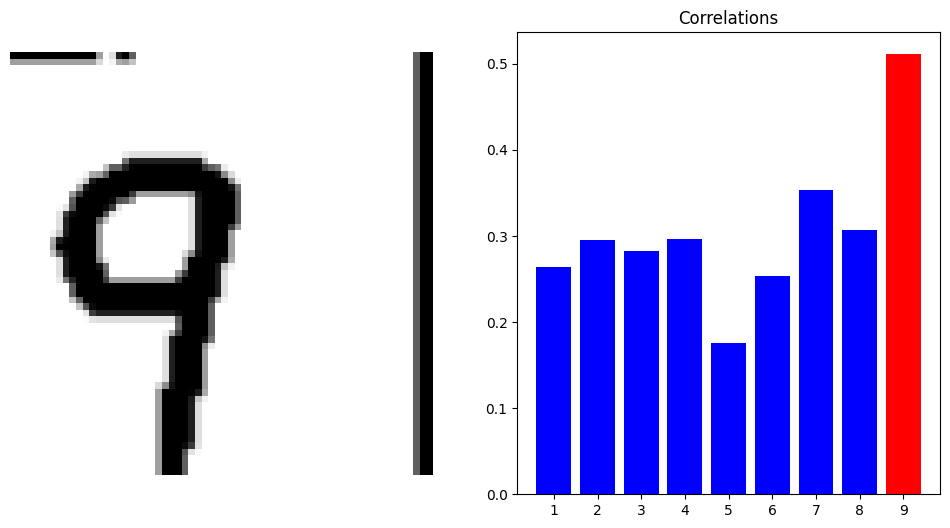

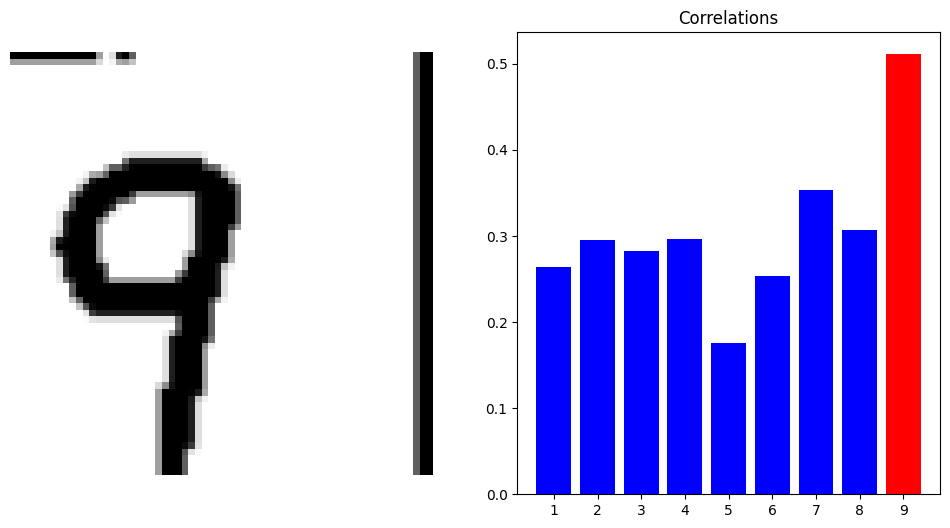

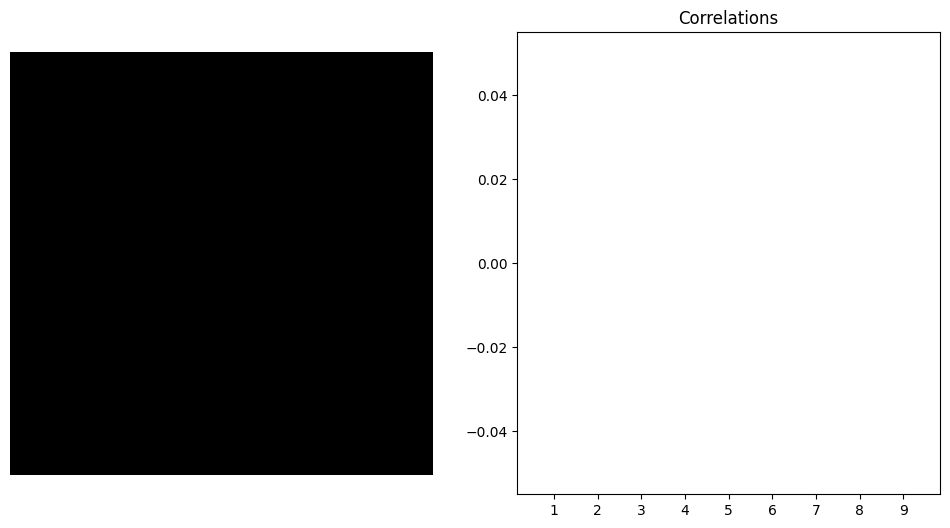

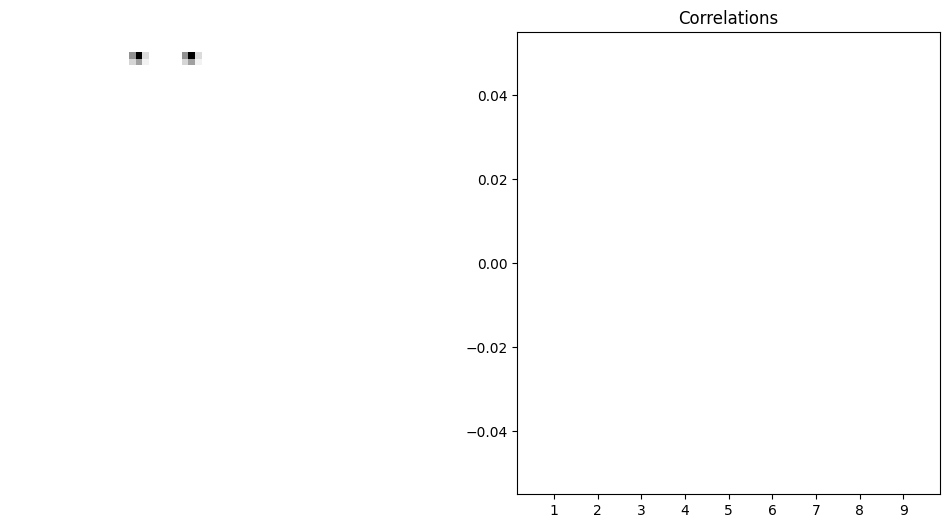

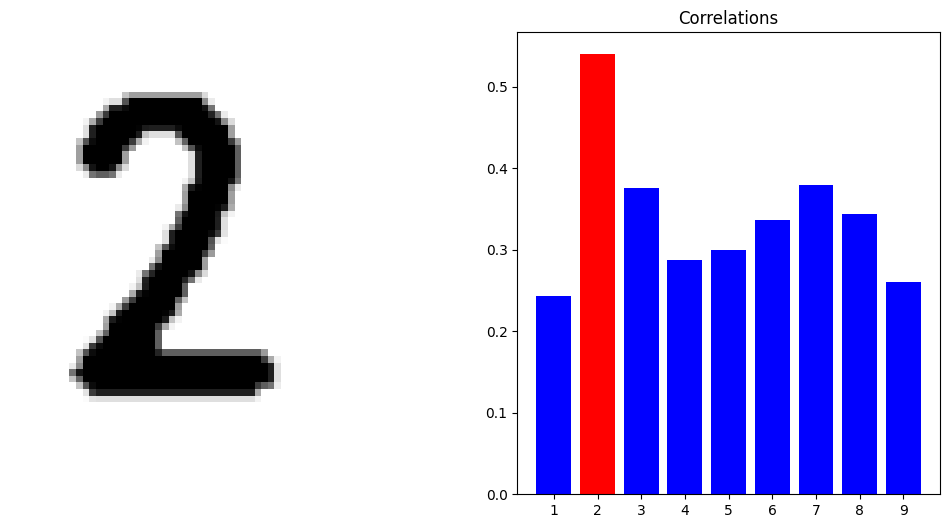

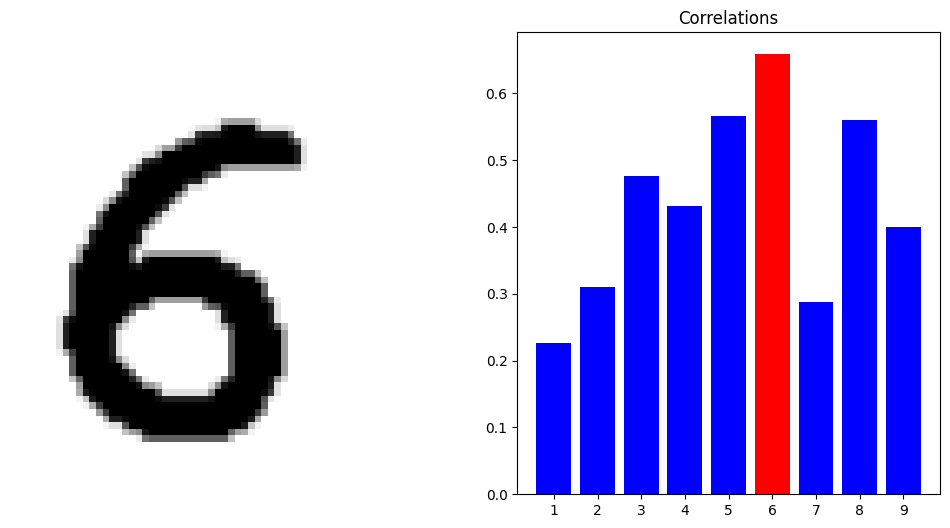

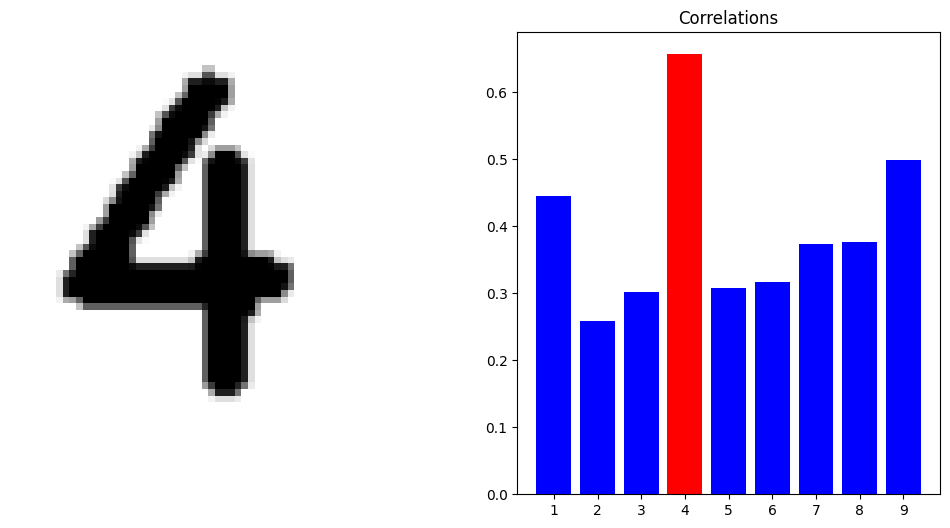

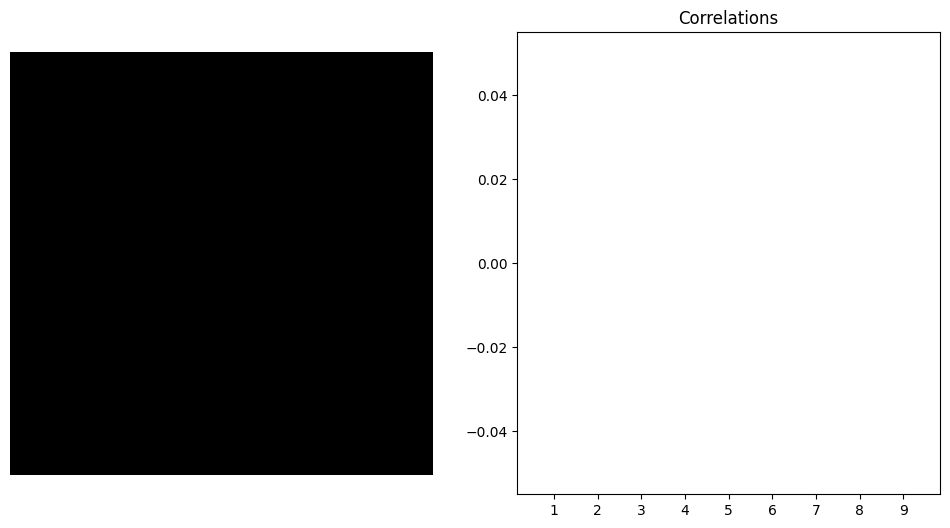

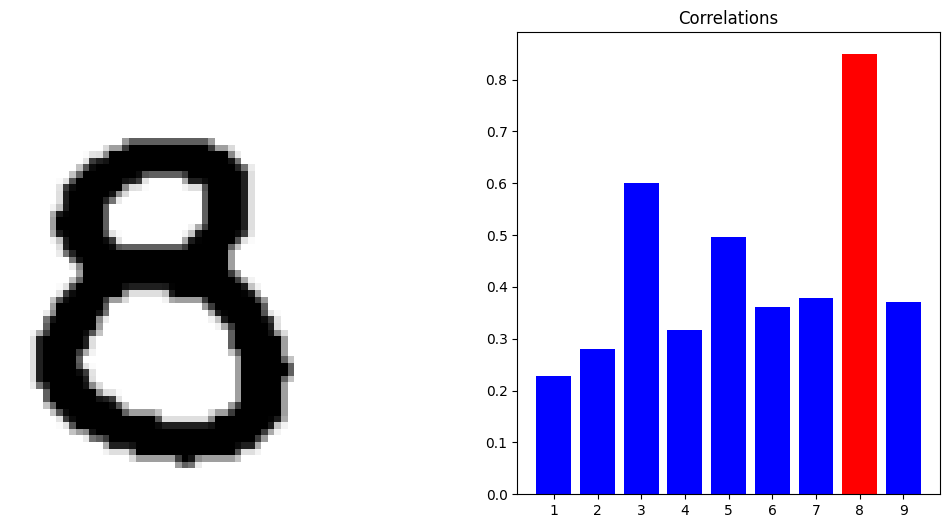

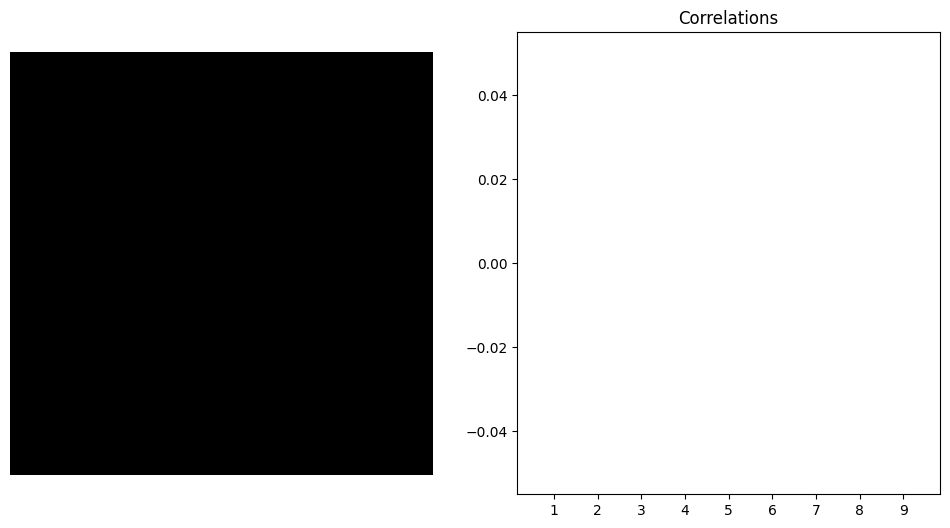

In [ ]:
templates_dict = load_templates()

#9
sudoku_cell_problems = [
    # Image 1
    # sudoku_cells[2, 8],  # should be 1
    # sudoku_cells[8, 0],  # should be 9
    #Image 2
    sudoku_cells[0, 2],  # should be 9
    # # Image 5
    # sudoku_cells[5, 5],  # should be 2
    # sudoku_cells[8, 2],  # should be 2
    # #image 6
    # sudoku_cells[0, 0],  # should be 1
    # Image 9
    sudoku_cells[0, 2],  # should be 9
    sudoku_cells[0, 5],  # should be 7
    sudoku_cells[1, 1],  # should be 7
    sudoku_cells[7, 7],  # should be 7
    sudoku_cells[3, 8],  # should be 2
    sudoku_cells[8, 6],  # should be 4
    sudoku_cells[8, 3],  # should be 1
    sudoku_cells[0, 4],  # should be .
    sudoku_cells[0, 6],  # should be 5
]

"""for cell in sudoku_cell_problems:
    correlations = get_digit_correlations(cell, templates_dict)
    show_correlations(cell, correlations)"""

"""correlations = get_digit_correlations(sudoku_cell, templates_dict)
show_correlations(sudoku_cell, correlations)"""


"""
for i in range(sudoku_cells.shape[0]):
    for j in range(sudoku_cells.shape[1]):
        print(i, j)
        correlations = get_digit_correlations(sudoku_cells[i, j], templates_dict)
        show_correlations(sudoku_cells[i, j], correlations)
        """


  0%|          | 0/10 [00:00<?, ?it/s]

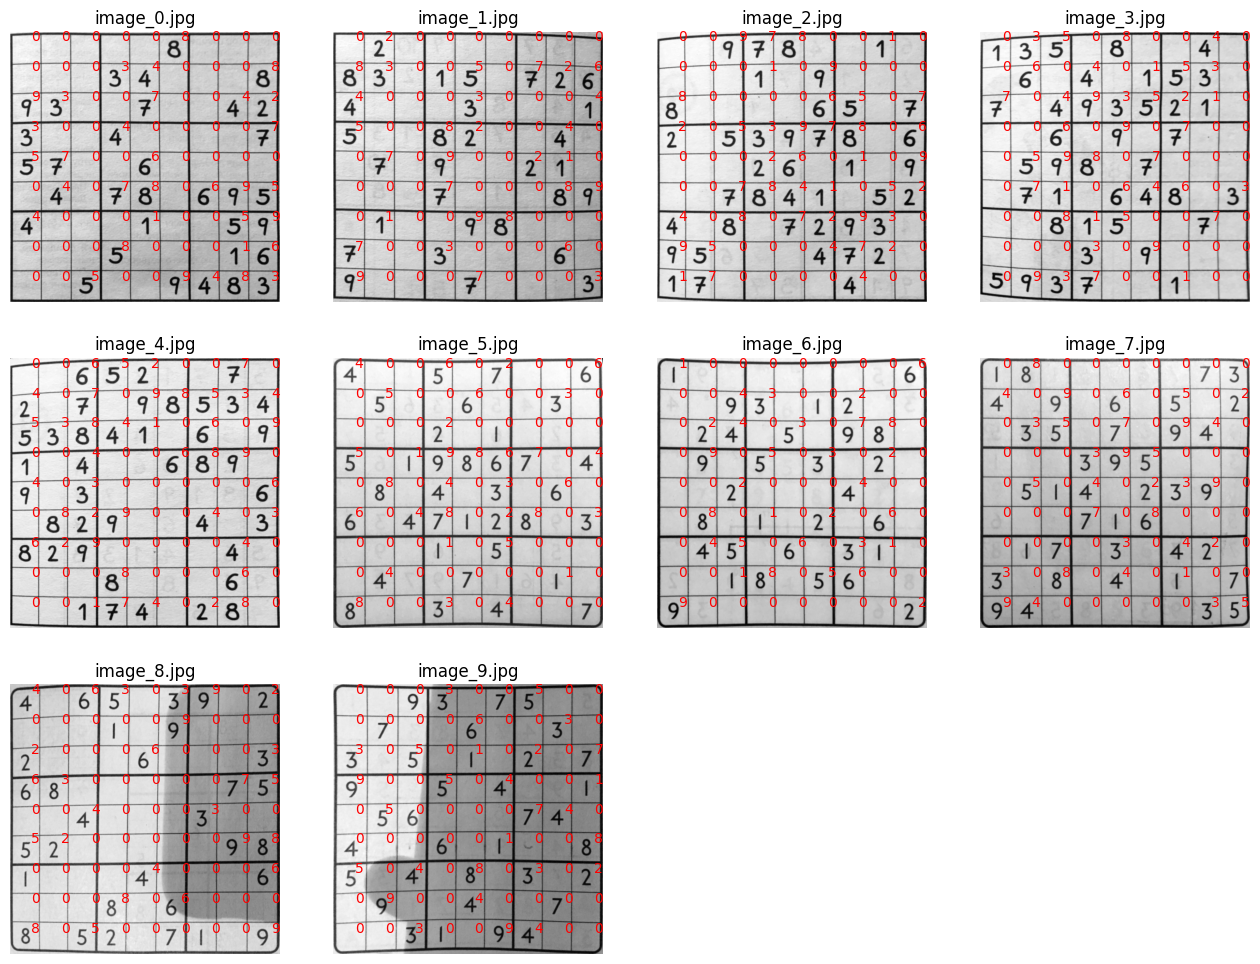

In [3]:

image_paths=[os.path.join(TRAIN_IMAGES_PATH, file_name) for file_name in sorted(os.listdir(TRAIN_IMAGES_PATH))
            if 'jpg' in os.path.splitext(file_name)[1]]

show_recognized_digits(image_paths=image_paths, pipeline=pipeline, figsize=(16, 12), digit_fontsize=10)

 .  .  9 | 7  8  . | .  1  .
 .  .  . | 1  .  9 | .  .  .
 8  .  . | .  .  6 | 5  .  7
---------+---------+---------
 2  .  5 | 3  9  7 | 8  .  6
 .  .  . | 2  6  . | 1  .  9
 .  .  7 | 8  4  1 | .  5  2
---------+---------+---------
 4  .  8 | .  7  2 | 9  3  .
 9  5  . | .  .  4 | 7  2  .
 1  7  . | .  .  . | 4  .  .
 5  2  9 | 7  8  3 | 6  1  4
 7  4  6 | 1  5  9 | 2  8  3
 8  3  1 | 4  2  6 | 5  9  7
---------+---------+---------
 2  1  5 | 3  9  7 | 8  4  6
 3  8  4 | 2  6  5 | 1  7  9
 6  9  7 | 8  4  1 | 3  5  2
---------+---------+---------
 4  6  8 | 5  7  2 | 9  3  1
 9  5  3 | 6  1  4 | 7  2  8
 1  7  2 | 9  3  8 | 4  6  5


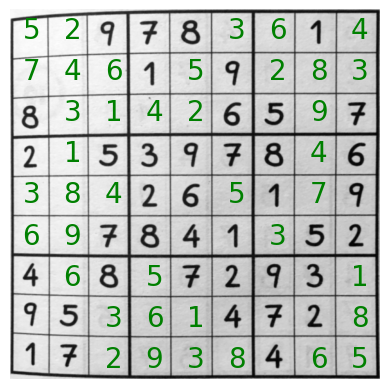

In [4]:
sudoku_matrix = recognize_digits(sudoku_cells, templates_dict)
image_paths=[os.path.join(TRAIN_IMAGES_PATH, file_name) for file_name in sorted(os.listdir(TRAIN_IMAGES_PATH))
             if 'jpg' in os.path.splitext(file_name)[1]]


mat = matrix_to_puzzle(sudoku_matrix)

print(matrix_to_puzzle(sudoku_matrix))
sudoku_matrix_solved = solve_sudoku(sudoku_matrix)
print(matrix_to_puzzle(sudoku_matrix_solved))
show_solved_sudoku(frontalized_image, sudoku_matrix, sudoku_matrix_solved)